In [1]:
import sys
import pandas as pd
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *
from plotting import *
from get_LrLx_data import *

# Get Data

In [2]:
source_df, obs_df, radio_df, xray_df = read_data("../DATA/MAXI J1807+132.txt")

MAXI J1807+132
Added 5% systematic uncertainty to the radio data.
X-ray uncertainty percentage:  68
Added 10.0% systematic uncertainty to the X-ray data.


In [3]:
obs_df

,name,xray_CI,xray_obs_ref,radio_obs_ref,extra_xray_text,extra_radio_text
0,MAXI J1807+132,68,[Crook-Mansour et al. (in prep.) & ],[ &],NaN,NaN


In [4]:
radio_df.head()

,name,blockID,band,t_radio,dt_radio,Rphase,Rstate,Fr,Fr_unc,local_rms,alpha,alpha_unc,Fr_uplim_bool
0,MAXI J1807+132,1688764579,L,60132.93806,0.010417,decay,HS,0.080,0.026667,0.019,NaN,NaN,True
1,MAXI J1807+132,1689525980,L,60141.74886,0.010417,decay,IMS,0.135,0.020163,0.020,NaN,NaN,False
2,MAXI J1807+132,1689958275,L,60146.75236,0.010417,decay,HS,0.212,0.070667,0.022,NaN,NaN,True
3,MAXI J1807+132,1690568489,L,60153.81543,0.010417,decay,SS,0.135,0.045000,0.019,NaN,NaN,True
4,MAXI J1807+132,1691176395,L,60160.85260,0.010417,decay,QS,0.111,0.037000,0.017,NaN,NaN,True


In [5]:
xray_df.head(4)

,name,obsID,t_xray,dt_xray,Xphase,Xstate,Fx,Fx_unc_l,Fx_unc_u,model,fit_stat,Fx_uplim_bool
0,MAXI J1807+132,16131001,60137.691262,0.018414,decay,IMS,6.841000e-10,6.853359e-11,6.853335e-11,tbabs * (pegpwrlw + bbody + diskbb),chi,False
1,MAXI J1807+132,16131002,60139.746215,0.073877,decay,IMS,7.084000e-10,7.095971e-11,7.095953e-11,tbabs * (pegpwrlw + bbody + diskbb),chi,False
2,MAXI J1807+132,16131003,60141.729988,0.018576,decay,IMS,5.580000e-10,5.591294e-11,5.591268e-11,tbabs * (pegpwrlw + bbody + diskbb),chi,False
3,MAXI J1807+132,16131004,60143.793241,0.052303,decay,IMS,4.481000e-10,4.552911e-11,4.553088e-11,tbabs * (pegpwrlw + bbody + diskbb),chi,False


# Light Curves

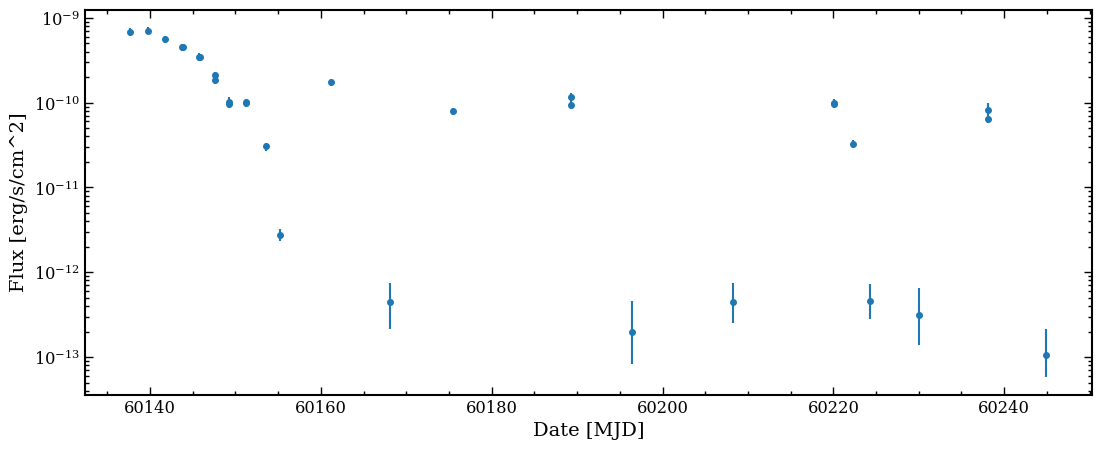

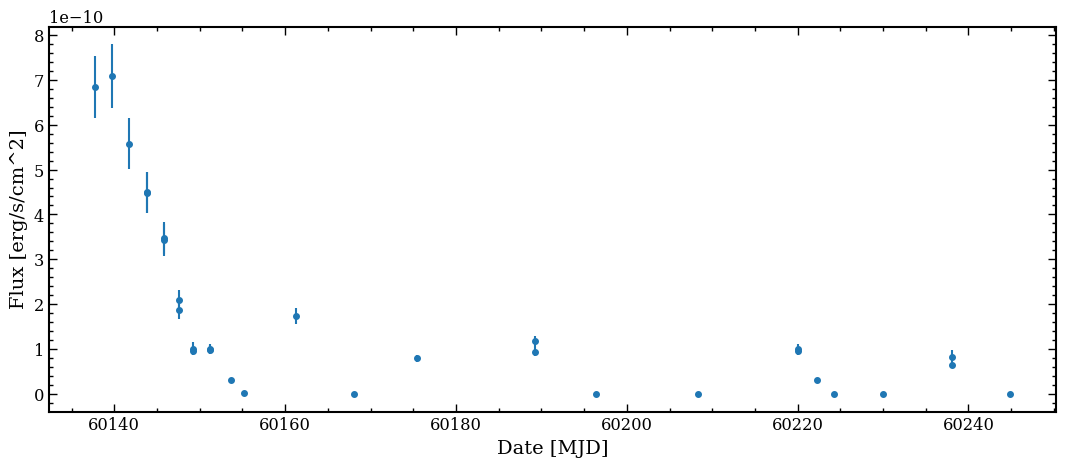

In [6]:
# WITH systematic errors
plot_xray_lightcurve(xray_df)

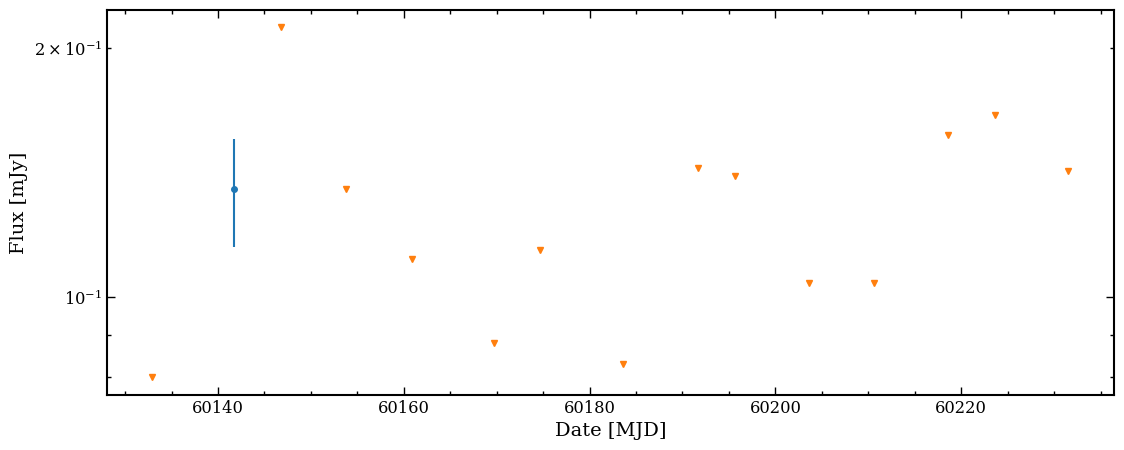

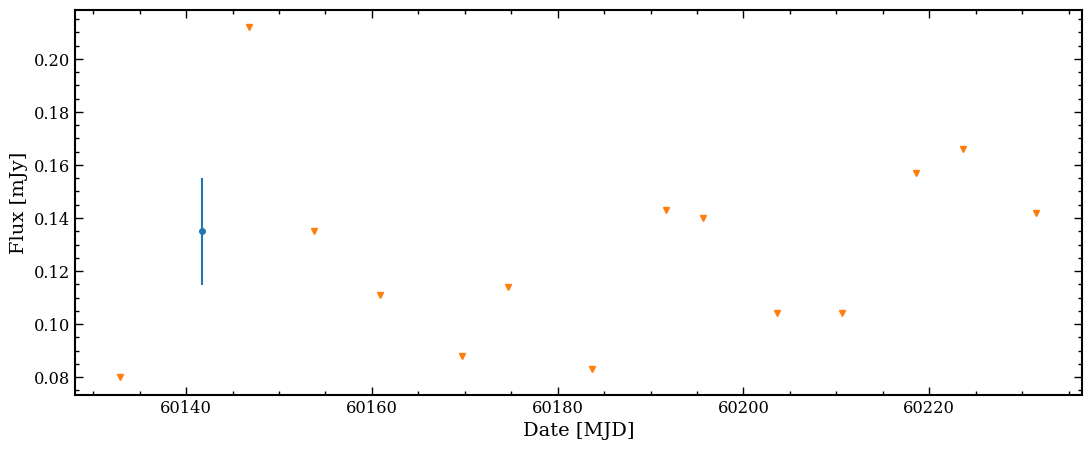

In [7]:
# WITH systematic error
plot_radio_lightcurve(radio_df)

# Pairing

In [8]:
paired_data = make_paired_Lr_Lx_df(radio_df, xray_df, source_df)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
60141.748860000     0.13500             0.02016             1         5.58000e-10                   5.59129e-11                   5.59127e-11                   False          False          IMS            
60146.752360000     0.21200             0.07067             4         2.35448e-10                   1.26495e-11                   1.26513e-11                   True           False          HS             
60153.815430000     0.13500             0.04500             1         3.04700e-11                   3.31234e-12                   3.31352e-12                   True           False          SS             
60160.852600000     0.11100             0.03700             1         1.73700e-10                   1.74926e-11                   1.74929e-11                   True           F

In [9]:
paired_data[["t", "Lr", "Lx", "state"]]

,t,Lr,Lx,state
0,60141.74886,8.207796e+27,2.650434e+36,IMS
1,60146.75236,1.288928e+28,1.118348e+36,HS
2,60153.81543,8.207796e+27,1.447289e+35,SS
3,60160.85260,6.748632e+27,8.250545e+35,QS
4,60174.67028,6.931028e+27,3.777581e+35,Unclear
5,60195.62164,8.511788e+27,9.409516e+32,Unclear
6,60223.59141,1.009255e+28,2.151696e+33,Unclear


In [10]:
lr_all, lx_all, all_types = get_bahramian_data()

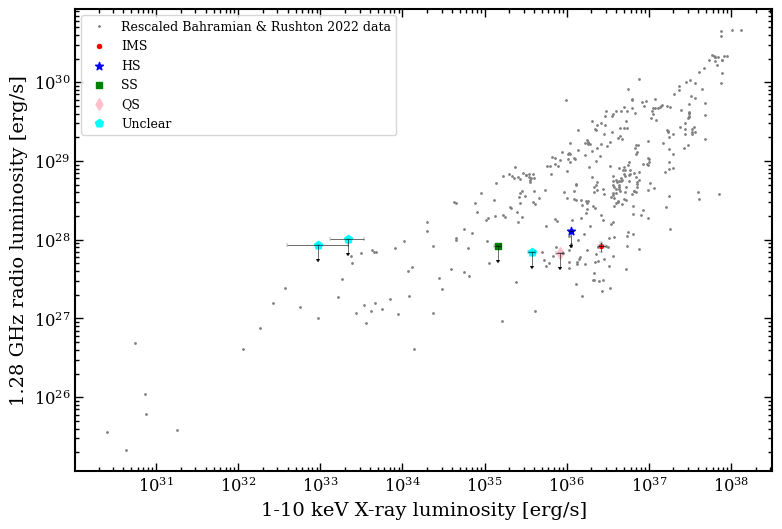

In [11]:
plot_Lr_Lx(paired_data, colourby="state", lx=lx_all, lr=lr_all)

# Interpolation

dt1, dt2:  3.0 10.0

Number of plotting points:  214
Rejected based on distance: radio_MJD = 60132.93806; time_to_nearest: 4.753201574072591; time_to_furthest: 60132.93806
60141.74886: time_to_nearest: 0.018871574073273223 & time_to_furthest: 2.070250634889817; y_predict_err: 0.04658344353171451
60146.75236: time_to_nearest: 0.8025941519299522 & time_to_furthest: 0.9482103652844671; y_predict_err: 0.028280938562168956
60153.81543: time_to_nearest: 0.18640222222165903 & time_to_furthest: 1.3926487037024344; y_predict_err: 0.05000477899320899
60160.8526: time_to_nearest: 0.38441388888895744 & time_to_furthest: 5.644521296293533; y_predict_err: 0.045381930477734755
60169.72614: time_to_nearest: 1.631649259259575 & time_to_furthest: 5.7165104629675625; y_predict_err: 0.2790829181905323
60174.67028: time_to_nearest: 0.772370462967956 & time_to_furthest: 6.575789259259182; y_predict_err: 0.04842961365853071
Rejected based on distance: radio_MJD = 60183.6425; time_to_nearest: 5.59452561776561

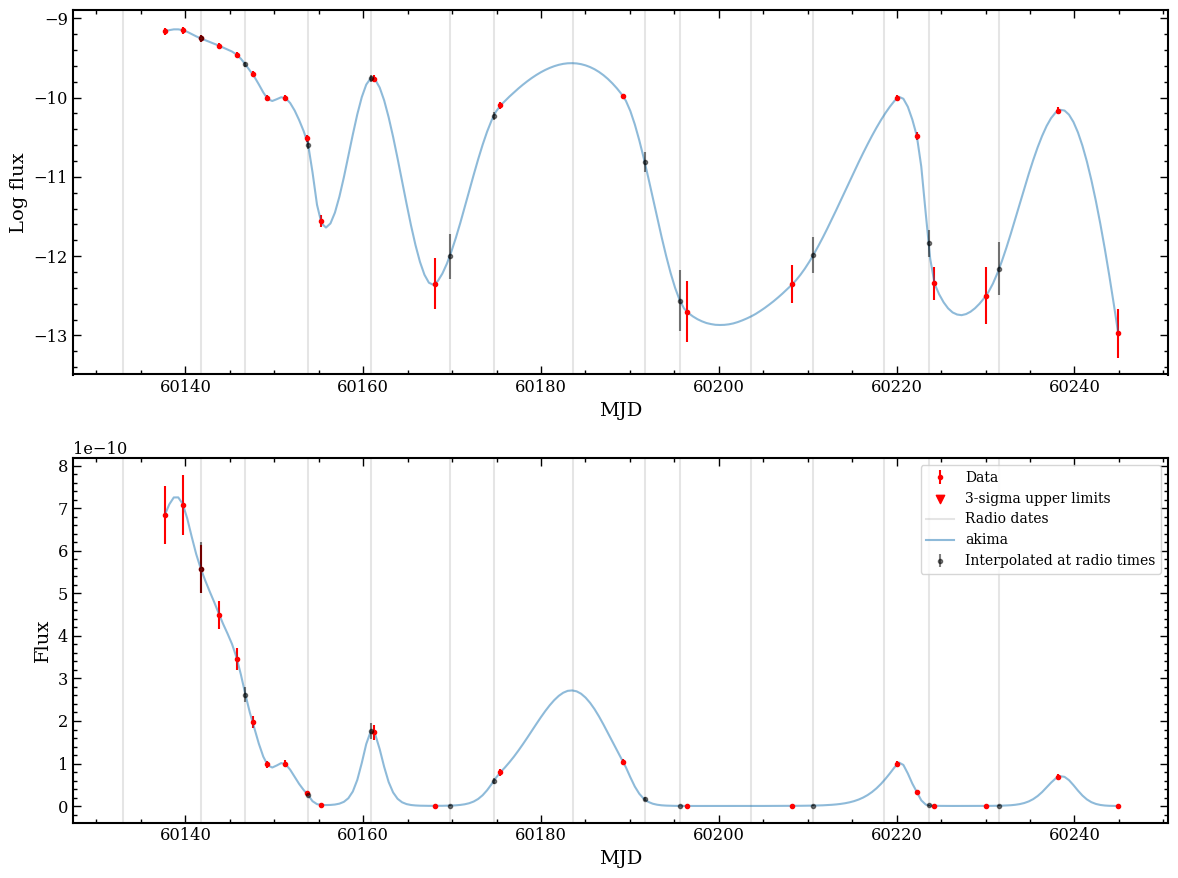

Number of used interpolated data points:  11
Converting to luminosity using d_kpc = 6.3


In [12]:
interpolated_data = make_interpolated_Lr_Lx_df(radio_df, xray_df, source_df, plotly=True)

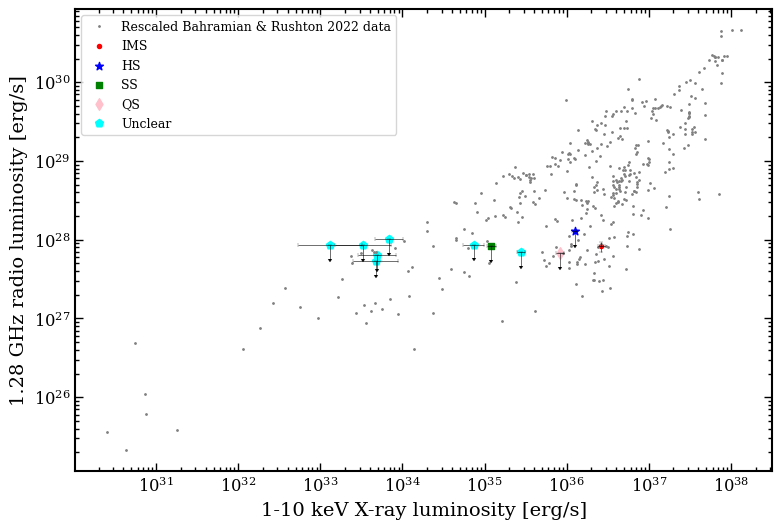

In [13]:
plot_Lr_Lx(interpolated_data, colourby="state", lx=lx_all, lr=lr_all)